In [139]:
# Importación de Librerías
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from wordcloud import WordCloud
import os
import re




%matplotlib inline
pd.set_option('display.max_columns', 30)
plt.rcParams['figure.figsize'] = [12.0, 8.0]

In [140]:
dataset= pd.read_csv("input/petfinder-adoption-prediction/train/train.csv")
print("Directorio actual:", os.getcwd())
dataset.head(20)
print("Número de filas y columnas:", dataset.shape)

Directorio actual: c:\Users\Gloria\Documents\AUSTRAL\LAB2\UA_MDM_Labo2_Grupo12
Número de filas y columnas: (14993, 24)


In [141]:
dataset.dtypes

Type               int64
Name              object
Age                int64
Breed1             int64
Breed2             int64
Gender             int64
Color1             int64
Color2             int64
Color3             int64
MaturitySize       int64
FurLength          int64
Vaccinated         int64
Dewormed           int64
Sterilized         int64
Health             int64
Quantity           int64
Fee                int64
State              int64
RescuerID         object
VideoAmt           int64
Description       object
PetID             object
PhotoAmt         float64
AdoptionSpeed      int64
dtype: object

In [142]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

In [143]:
dataset.Description


0        Nibble is a 3+ m...
1        I just found it ...
2        Their pregnant m...
3        Good guard dog, ...
4        This handsome ye...
                ...         
14988    I have 4 kittens...
14989    Serato(female ca...
14990    Mix breed, good ...
14991    she is very shy....
14992    Fili just loves ...
Name: Description, Length: 14993, dtype: object

In [144]:
#preprocesamiento de texto para la columna description


def clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()  
    text = re.sub(r'\W+', ' ', text)  # Eliminar caracteres especiales
    text = re.sub(r'\b\w\b', ' ', text)  # Eliminar números o letras individuales
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra
    return text

In [145]:
dataset['Description_limpia'] = dataset['Description'].apply(clean_text)

In [146]:
dataset['Description_limpia'].head(10)

0    nibble is month ...
1    just found it al...
2    their pregnant m...
3    good guard dog v...
4    this handsome ye...
5    this is stray ki...
6    anyone within th...
7    siu pak just giv...
8    healthy and acti...
9    very manja and g...
Name: Description_limpia, dtype: object

In [147]:
# Función para identificar caracteres especiales eliminados
def get_removed_special_chars(original, cleaned):
    if pd.isna(original):  # Si el texto original es NaN
        return []
    # Convertir ambos textos a conjuntos de caracteres
    original_chars = set(original)  # Conjunto de caracteres del texto original
    cleaned_chars = set(cleaned)    # Conjunto de caracteres del texto limpio
    # Identificar los caracteres que están en el original pero no en el limpio
    removed_chars = original_chars - cleaned_chars
    # Mostrar todo lo eliminado (caracteres especiales, números y letras individuales)
    all_removed_chars = [char for char in removed_chars if not char.isspace()]
    return all_removed_chars

# Aplicar la función para generar la nueva columna
dataset['Removed_Special_Chars'] = dataset.apply(
    lambda row: get_removed_special_chars(row['Description'], row['Description_limpia']), axis=1
)

In [148]:
descripcion_df=dataset[['Description', 'Description_limpia', 'Removed_Special_Chars']]
descripcion_df.head(5)

,Description,Description_limpia,Removed_Special_Chars
0,Nibble is a 3+ m...,nibble is month ...,"[N, L, T, +, 3, ..."
1,I just found it ...,just found it al...,"[., I]"
2,Their pregnant m...,their pregnant m...,"[J, N, T, G, ,, ..."
3,"Good guard dog, ...",good guard dog v...,"[,, !, G]"
4,This handsome ye...,this handsome ye...,"[W, T, C, P, ,, ..."


In [149]:
# Mapear 1 y 2 a 'Perro' y 'Gato'
#data['tipo_animal'] = data['Type'].map({1: 'Perro', 2: 'Gato'})

# Agrupar, contar y calcular porcentaje
freq_percent = (
    dataset.groupby('Type')['Name']
    .value_counts(dropna=False)
    .rename('Frecuencia')
    .reset_index()
)

# Calcular porcentaje dentro de cada tipo
freq_percent['Porcentaje (%)'] = (
    freq_percent['Frecuencia'] /
    freq_percent.groupby('Type')['Frecuencia'].transform('sum') * 100
).round(2)

# Ordenar por tipo de animal y frecuenfreq_percent = freq_percent.sort_values(['Frecuencia', 'Type'], ascending=[False, True])

freq_percent

,Type,Name,Frecuencia,Porcentaje (%)
0,1,NaN,653,8.03
1,1,Lucky,48,0.59
2,1,Puppy,45,0.55
3,1,Brownie,44,0.54
4,1,Max,35,0.43
...,...,...,...,...
9725,2,é»é» Hei Hei,1,0.01
9726,2,ð¸ð·ð Tak...,1,0.01
9727,2,ðððð,1,0.01
9728,2,ððSolid Bl...,1,0.01


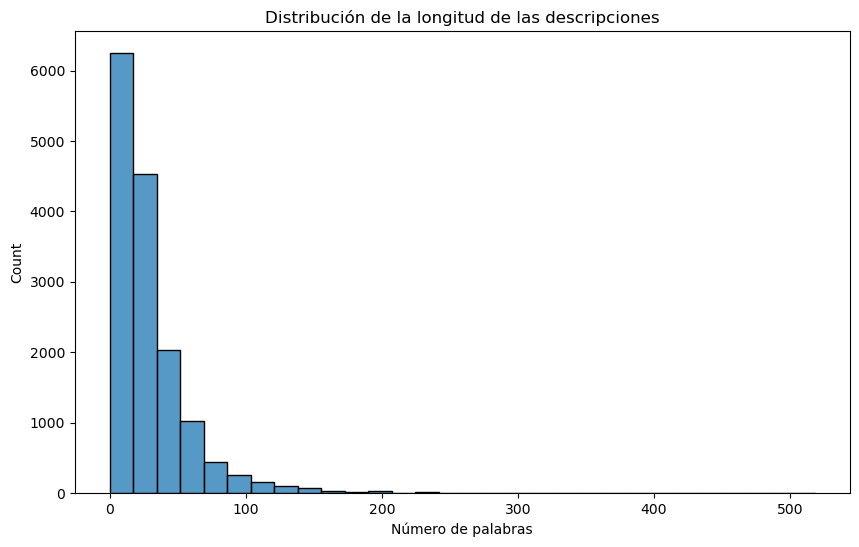

In [150]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS


dataset['longitud_descripcion'] = dataset['Description_limpia'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)
dataset['cantidad_palabras_no_stopwords'] = dataset['Description_limpia'].apply(lambda x: len([word for word in x.split() if word.lower() not in ENGLISH_STOP_WORDS]) if isinstance(x, str) else 0)
dataset['stopwords_eliminadas'] = dataset['Description_limpia'].apply(lambda x: ([word for word in x.split() if word.lower() in ENGLISH_STOP_WORDS]) if isinstance(x, str) else 0)



plt.figure(figsize=(10, 6))
sns.histplot(dataset['cantidad_palabras_no_stopwords'], bins=30)



plt.title('Distribución de la longitud de las descripciones')
plt.xlabel('Número de palabras')
plt.show()


In [151]:
print("Longitud máxima:", dataset['longitud_descripcion'].max())
print("Longitud mínima:", dataset['longitud_descripcion'].min())
print("Longitud promedio:", dataset['longitud_descripcion'].mean())
print("Longitud mediana:", dataset['longitud_descripcion'].median())
print("Longitud tercer cuartil:", dataset['longitud_descripcion'].quantile(0.75))


Longitud máxima: 1164
Longitud mínima: 0
Longitud promedio: 59.39998666044154
Longitud mediana: 42.0
Longitud tercer cuartil: 76.0


In [152]:
pd.set_option('display.max_colwidth', None)
dataset['descripcion_para_analisis'] = dataset['Description_limpia'].apply(lambda x: ([word for word in x.split() if word.lower() not in ENGLISH_STOP_WORDS]) if isinstance(x, str) else 0)
dataset['palabras_caracteres_eliminados']= dataset['Removed_Special_Chars']+dataset['stopwords_eliminadas'] 


(dataset[['Description', 'palabras_caracteres_eliminados', 'descripcion_para_analisis']].head(4))

,Description,palabras_caracteres_eliminados,descripcion_para_analisis
0,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,"[N, L, T, +, 3, ., I, ', H, is, of, he, is, and, of, few, but, could, not, get, them, in, as, the, was, the, was, this, do, not, have, enough, and, to, for, more, in, my, for, to, take, over]","[nibble, month, old, ball, cuteness, energetic, playful, rescued, couple, cats, months, ago, neutered, time, clinic, fully, scheduled, result, little, kitty, space, funds, care, cats, household, looking, responsible, people, nibble, care]"
1,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,"[., I, found, it, alone, my, it, was, so, had, to, it, to]","[just, yesterday, near, apartment, shaking, bring, home, provide, temporary, care]"
2,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.","[J, N, T, G, ,, I, S, ., A, H, their, was, by, her, at, the, some, in, to, them, at, the, they, are, all, and, already, and, to, go, to, no, or, for, as, however, it, is, to, or, for, to, call, me]","[pregnant, mother, dumped, irresponsible, owner, roadside, near, shops, subang, jaya, gave, birth, roadside, healthy, adorable, puppies, dewormed, vaccinated, ready, home, tying, caging, long, hours, guard, dogs, acceptable, cage, tie, precautionary, purposes, interested, adopt, pls]"
3,"Good guard dog, very alert, active, obedience waiting for her good master, plz call or sms for more details if you really get interested, thanks!!","[,, !, G, very, for, her, call, or, for, more, if, you, get]","[good, guard, dog, alert, active, obedience, waiting, good, master, plz, sms, details, really, interested, thanks]"


[('home', 7849), ('dog', 4540), ('cat', 4093), ('adoption', 4025), ('good', 3563), ('adopt', 3343), ('old', 2881), ('contact', 2801), ('interested', 2784), ('looking', 2766), ('playful', 2749), ('love', 2689), ('loving', 2665), ('kitten', 2626), ('care', 2468), ('puppy', 2325), ('owner', 2275), ('healthy', 2260), ('cats', 2193), ('house', 2178)]


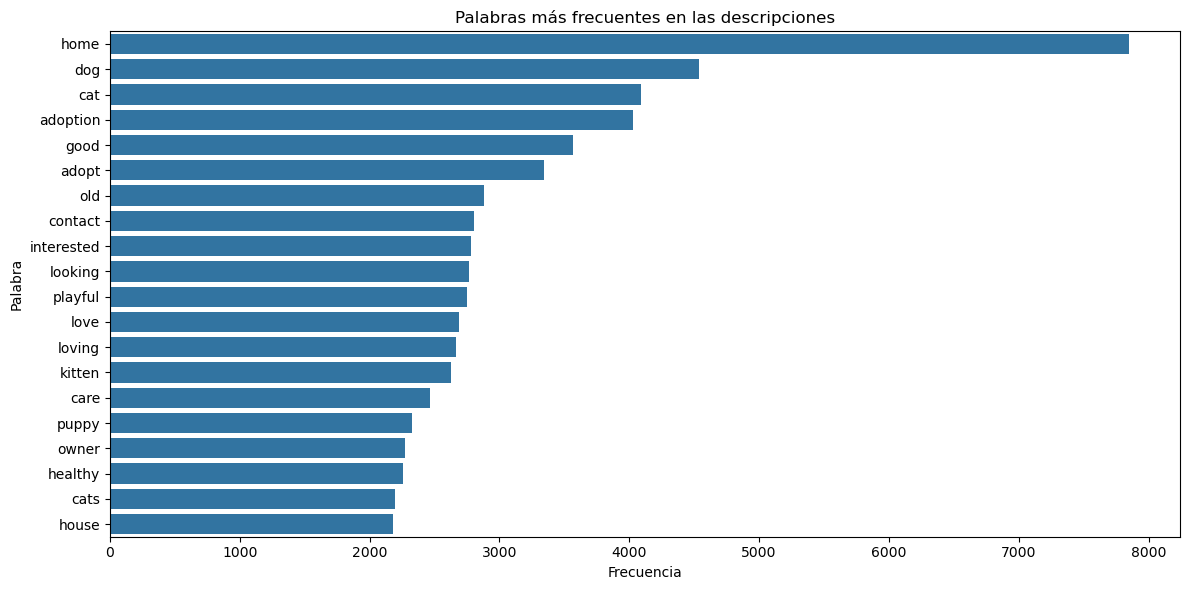

In [153]:
# Combinar todas las descripciones en una lista de palabras
import itertools
from collections import Counter 
# Combinar todas las palabras de la columna 'descripcion_para_analisis'
todas_palabras = list(itertools.chain.from_iterable(dataset['descripcion_para_analisis']))
palabras_comunes = Counter(todas_palabras).most_common(20)
print(palabras_comunes)



# Visualizar con un gráfico de barras
plt.figure(figsize=(12, 6))
palabras_df = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])
sns.barplot(x='Frecuencia', y='Palabra', data=palabras_df)
plt.title('Palabras más frecuentes en las descripciones')
plt.tight_layout()
plt.show();


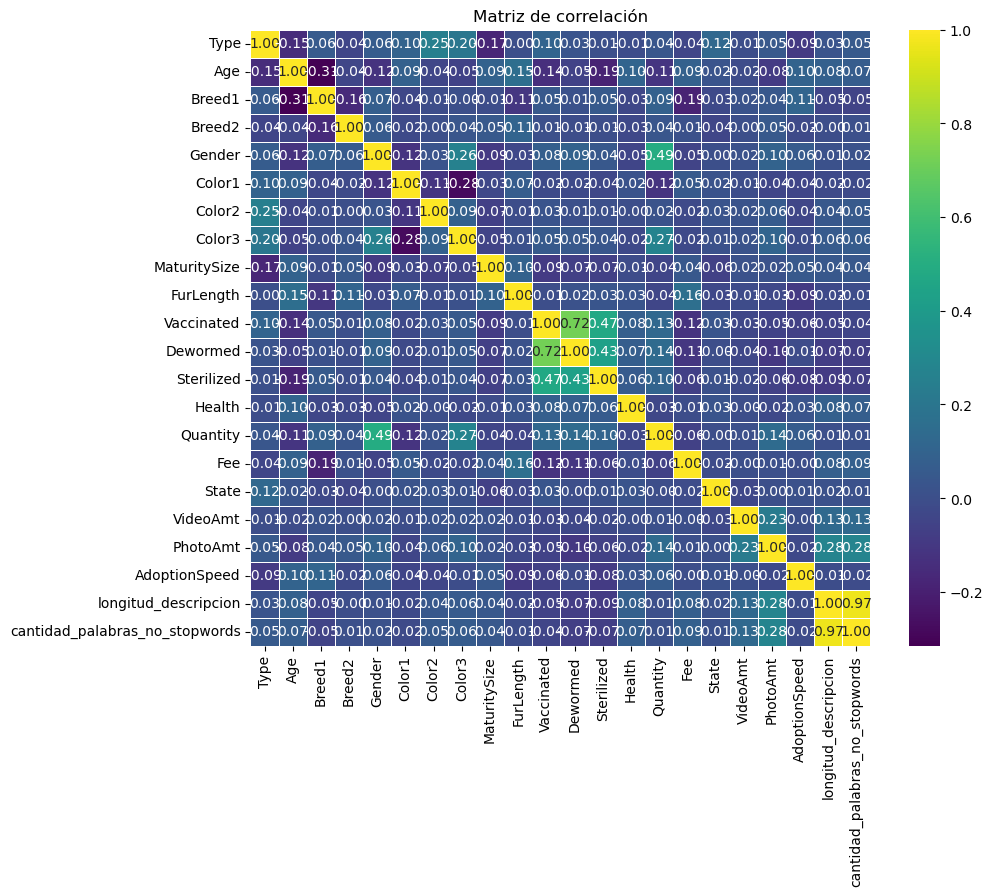

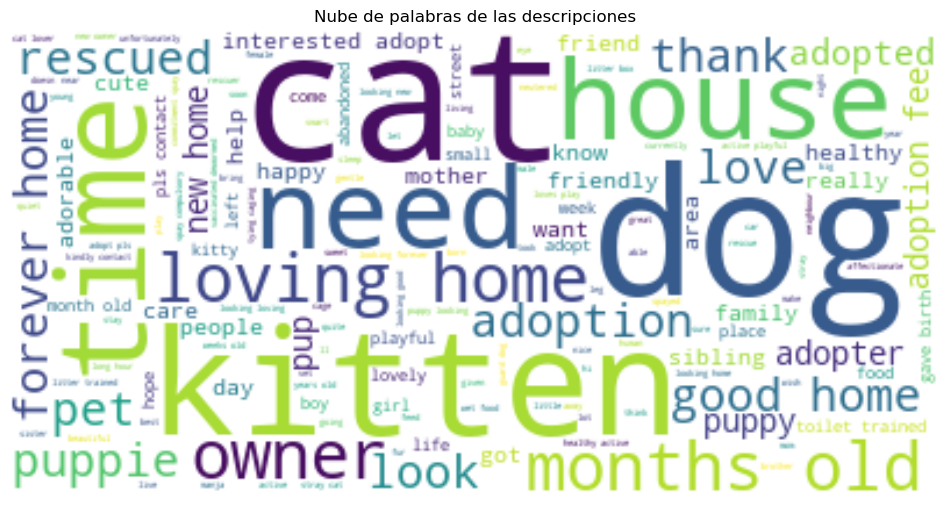

In [154]:
from wordcloud import ImageColorGenerator

# Crear la matriz de correlación
numeric_vars = dataset.select_dtypes(include=[np.number]).columns.tolist()
correlacion = dataset[numeric_vars].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlacion, annot=True, fmt='.2f', linewidths=0.5, cbar=True, cmap='viridis')
plt.title('Matriz de correlación')
plt.show()

# Usar los colores del mapa de calor para la nube de palabras
cmap = plt.get_cmap('coolwarm')
wordcloud = WordCloud(background_color='white', colormap='viridis').generate(" ".join(todas_palabras))

# Visualizar la nube de palabras
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de palabras de las descripciones')
plt.show()

In [155]:
dataset.RescuerID.value_counts()

RescuerID
fa90fa5b1ee11c86938398b60abc32cb    459
aa66486163b6cbc25ea62a34b11c9b91    315
c00756f2bdd8fa88fc9f07a8309f7d5d    231
b53c34474d9e24574bcec6a3d3306a0d    228
ee2747ce26468ec44c7194e7d1d9dad9    156
                                   ... 
89bc6d71d57ad5d7e952ed76559345c5      1
8cfafc812c500eee7c112911ef668ce9      1
8512e22c06a01cdc76481ff0a6e88b67      1
48de9ff092328d54b2b371bc72b07b03      1
79309f4027f2fedb4349a298c69fe56f      1
Name: count, Length: 5595, dtype: int64

In [156]:
dataset['RescuerID'].nunique()

5595

In [157]:
dataset['Breed2'].isna().sum()

0

In [158]:
import unicodedata
import re

# Función para limpiar texto y dejar solo caracteres alfanuméricos y espacios
def clean_text_unicode(text):
    if pd.isna(text):
        return ''
    # Normalizar texto y filtrar caracteres alfanuméricos
    text = ''.join(
        char for char in unicodedata.normalize('NFKD', text)
        if char.isalnum() or char.isspace()
    )
    # Eliminar caracteres específicos como 'ð' o patrones no deseados
    text = re.sub(r'[ð]', '', text)  # Eliminar 'ð'
    text = re.sub(r'ðð', '', text)  # Eliminar 'ðð'
    text = text.lower()  # Convertir a minúsculas
    text = re.sub(r'\s+', ' ', text).strip()  # Eliminar espacios extra
    return text

# Aplicar la función a la columna 'Name'
dataset['Nombres_limpios'] = dataset['Name'].apply(lambda x: clean_text_unicode(x))

In [159]:

# Calcular frecuencias y porcentajes
freq_percent = (
    dataset.groupby('Type')['Nombres_limpios']
    .value_counts(dropna=False)
    .rename('Frecuencia')
    .reset_index()
)

freq_percent['Porcentaje (%)'] = (
    freq_percent['Frecuencia'] /
    freq_percent.groupby('Type')['Frecuencia'].transform('sum') * 100
).round(2)

freq_percent

,Type,Nombres_limpios,Frecuencia,Porcentaje (%)
0,1,,659,8.10
1,1,lucky,50,0.61
2,1,puppy,49,0.60
3,1,brownie,45,0.55
4,1,max,36,0.44
...,...,...,...,...
9414,2,zoro luna,1,0.01
9415,2,zorro mira,1,0.01
9416,2,zuba,1,0.01
9417,2,æ aa1,1,0.01


          Quantity
count  5595.000000
mean      4.223414
std      13.387855
min       1.000000
25%       1.000000
50%       2.000000
75%       4.000000
max     531.000000


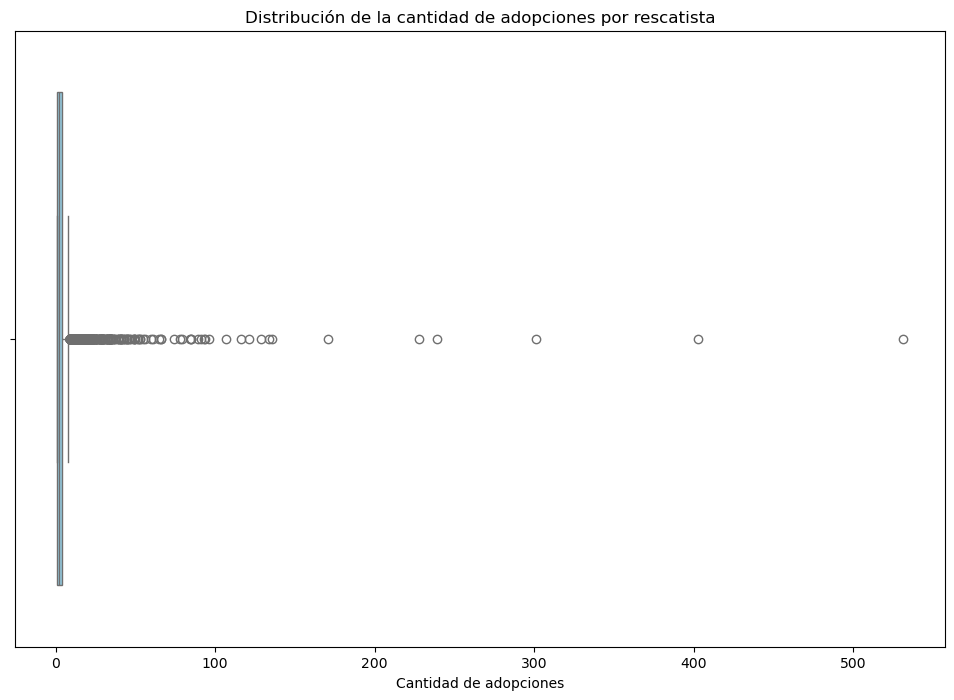

El cuartil 95 de adoptados_por_rescatista es 13.0
El cuartil 98 de adoptados_por_rescatista es 25.0
El cuartil 99 de adoptados_por_rescatista es 39.0


In [160]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con la cantidad de adopciones por rescatista
adoptados_por_rescatista = dataset.groupby('RescuerID')['Quantity'].sum().reset_index().sort_values(by='Quantity', ascending=False)
print(adoptados_por_rescatista.describe())

# Crear el boxplot
plt.figure()
sns.boxplot(data=adoptados_por_rescatista, x='Quantity', color='skyblue', orient='h')
plt.title('Distribución de la cantidad de adopciones por rescatista')
plt.xlabel('Cantidad de adopciones')
plt.show()

print(f"El cuartil 95 de adoptados_por_rescatista es {adoptados_por_rescatista['Quantity'].quantile(0.95)}")  # 95 percentil.quantile(0.95)) # 95 percentil
print(f"El cuartil 98 de adoptados_por_rescatista es {adoptados_por_rescatista['Quantity'].quantile(0.98)}") 
print(f"El cuartil 99 de adoptados_por_rescatista es {adoptados_por_rescatista['Quantity'].quantile(0.99)}") 

In [161]:
#mapeo de cantidad de rescatados por RescuerID
dataset['rescatados_por_este_rescatista'] = dataset['RescuerID'].map(adoptados_por_rescatista.set_index('RescuerID')['Quantity'])
dataset['rescatados_por_este_rescatista'].head(10)

0      9
1      1
2    531
3     74
4    134
5      4
6     18
7     13
8      7
9      1
Name: rescatados_por_este_rescatista, dtype: int64

In [162]:
adoptados_por_rescatista.head

<bound method NDFrame.head of                              RescuerID  Quantity
5485  fa90fa5b1ee11c86938398b60abc32cb       531
3768  aa66486163b6cbc25ea62a34b11c9b91       403
4228  c00756f2bdd8fa88fc9f07a8309f7d5d       301
5204  ee2747ce26468ec44c7194e7d1d9dad9       239
3996  b53c34474d9e24574bcec6a3d3306a0d       228
...                                ...       ...
3694  a720d11e8b853f45a73ee3a39205a5e0         1
3695  a726351f94bc43a52583aafafbedbfd4         1
2081  5c4575fb03c90d927b819d828c0db5c4         1
810   22b122de4ed5d110a296a33464634e54         1
1103  3014026a7345607c2ef6b5f4af503a9e         1

[5595 rows x 2 columns]>

In [163]:
dataset[['RescuerID', 'rescatados_por_este_rescatista']].head(10)

,RescuerID,rescatados_por_este_rescatista
0,8480853f516546f6cf33aa88cd76c379,9
1,3082c7125d8fb66f7dd4bff4192c8b14,1
2,fa90fa5b1ee11c86938398b60abc32cb,531
3,9238e4f44c71a75282e62f7136c6b240,74
4,95481e953f8aed9ec3d16fc4509537e8,134
5,22fe332bf9c924d4718005891c63fbed,4
6,1e0b5a458b5b77f5af581d57ebf570b3,18
7,1fba5f6e5480946254590d48f9c5198d,13
8,d8af7afece71334473575c9f70daf00d,7
9,1f3f36e4b18e94855b3e88af0852fdc4,1


In [164]:
pd.set_option('display.max_colwidth', 20)
(len(dataset[dataset['rescatados_por_este_rescatista']==531]))

459

In [165]:
rescatista_531 = dataset[dataset['rescatados_por_este_rescatista']==531]
print(rescatista_531[['RescuerID','rescatados_por_este_rescatista','Description', 'Quantity']].head(3))
rescatista_531.Quantity.sum()

              RescuerID  rescatados_por_este_rescatista          Description  \
2   fa90fa5b1ee11c86...                  531             Their pregnant m...   
48  fa90fa5b1ee11c86...                  531             We are cute and ...   
83  fa90fa5b1ee11c86...                  531             Lovely puppy wit...   

    Quantity  
2          1  
48         9  
83         1  


531

In [166]:
def disponibilidad_imagen(x, y):
    if pd.isna(x) and pd.isna(y):
        return 0
    elif pd.isna(x) or pd.isna(y):
        return 1
    elif x == 0 and y == 0:
        return 2
    elif x >= 1 and y == 0:
        return 3
    elif x == 0 and y >= 1:
        return 4
    elif x >= 1 and y >= 1:
        return 5
    else:
        return 6

dataset['disponibilidad_imagen'] = dataset.apply(lambda row: disponibilidad_imagen(row['PhotoAmt'], row['VideoAmt']), axis=1)
dataset[['PhotoAmt', 'VideoAmt', 'disponibilidad_imagen']].head(10)
    

,PhotoAmt,VideoAmt,disponibilidad_imagen
0,1.0,0,3
1,2.0,0,3
2,7.0,0,3
3,8.0,0,3
4,3.0,0,3
5,2.0,0,3
6,3.0,0,3
7,9.0,0,3
8,6.0,0,3
9,2.0,0,3


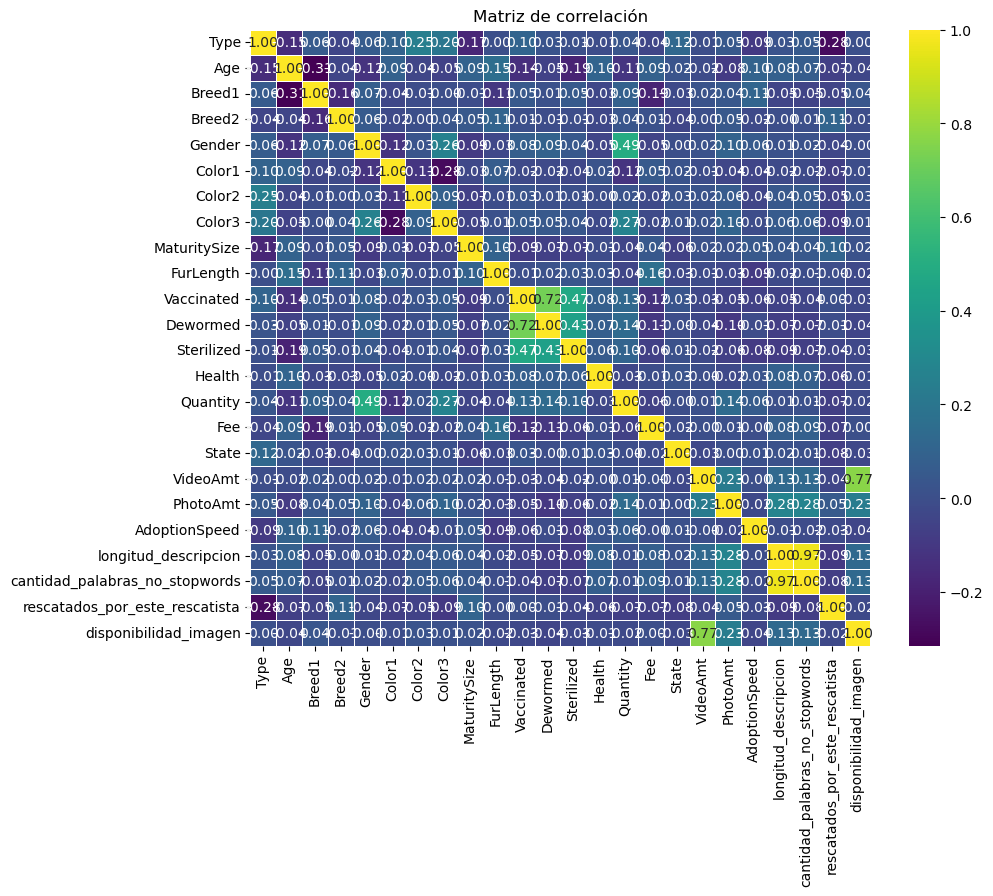

In [167]:
numeric_vars = dataset.select_dtypes(include=[np.number]).columns.tolist()
correlacion = dataset[numeric_vars].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlacion, annot=True, fmt='.2f', linewidths=0.5, cbar=True, cmap='viridis')
plt.title('Matriz de correlación')
plt.show()


In [171]:
dataset['disponibilidad_imagen'].value_counts()

disponibilidad_imagen
3    14079
5      573
2      340
4        1
Name: count, dtype: int64